### Modelo comparativo a CNN

In [1]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from PIL import Image

def calcular_medias_desv_estandar(mydir):
    medias = []
    desv_estandar = []
    y = []
    for name in listdir(mydir):
        path = join(mydir, name)
        if isfile(path):
            data = Image.open(path).convert('L')
            data = data.resize((128, 128))
            data = np.array(data)
            media = np.mean(data)
            desv = np.std(data)
            target = name[0]
            medias.append(media)
            desv_estandar.append(desv)
            if name[0] == 'H':
                y.append(0)
            if name[0] == 'I':
                y.append(1)
            if name[0] == 'O':
                y.append(2)
            if name[0] == 'B':
                y.append(3)
            if name[0] == 'C':
                y.append(4)
    df = pd.DataFrame({'media': medias, 'desv_estandar': desv_estandar, 'target': y})
    return df

In [2]:
    mydir_4 = r"BANCOS/grey/4096/10giros/Banco_LOCAL_COLOR"
df = calcular_medias_desv_estandar(mydir_4)

In [3]:
df

,media,desv_estandar,target
0,106.017822,121.865484,3
1,105.146240,122.461993,3
2,105.765015,122.052286,3
3,105.441345,122.269673,3
4,105.852539,122.004631,3
...,...,...,...
1081,105.326294,122.437530,2
1082,104.782288,122.805002,2
1083,105.116333,122.561337,2
1084,105.211548,122.492738,2


In [4]:
df.describe()

,media,desv_estandar,target
count,1086.000000,1086.000000,1086.000000
mean,105.033370,122.602916,2.022099
std,0.838917,0.601204,1.422489
min,103.634033,120.881828,0.000000
25%,104.328278,122.099429,1.000000
50%,104.786499,122.782621,2.000000
75%,105.706207,123.105422,3.000000
max,107.335571,123.593235,4.000000


In [5]:
len(df)

1086

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


### Regresión logistica + GridSearch (Sin normalizar)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

X = df[['media', 'desv_estandar']].values
y = df['target'].values

# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear modelo de regresión logística
modelo = LogisticRegression(random_state=42, multi_class='multinomial')

# Definir los hiperparámetros para buscar con GridSearchCV
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
              'C': [0.1, 1, 10, 100, 1000, 10000, 100000]}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(modelo, param_grid, cv=5)

# Entrenar modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y su precisión
best_model = grid_search.best_estimator_
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print('Mejores hiperparámetros encontrados:', grid_search.best_params_)
print('Precisión en entrenamiento:', train_accuracy)
print('Precisión en test:', test_accuracy)


C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the co

C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line se

C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\envs

Mejores hiperparámetros encontrados: {'C': 10000, 'solver': 'newton-cg'}
Precisión en entrenamiento: 0.7200460829493087
Precisión en test: 0.7018348623853211


C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = df[['media', 'desv_estandar']].values
y = df['target'].values

# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear pipeline con normalización y modelo de regresión logística
modelo = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, multi_class='multinomial'))

# Definir los hiperparámetros para buscar con GridSearchCV
param_grid = {'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
              'logisticregression__C': [0.001,0.01,0.1, 1, 10, 100, 1000]}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(modelo, param_grid, cv=5)

# Entrenar modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y su precisión
best_model = grid_search.best_estimator_
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print('Mejores hiperparámetros encontrados:', grid_search.best_params_)
print('Precisión en entrenamiento:', train_accuracy)
print('Precisión en test:', test_accuracy)


C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_s

Mejores hiperparámetros encontrados: {'logisticregression__C': 100, 'logisticregression__solver': 'newton-cg'}
Precisión en entrenamiento: 0.716589861751152
Precisión en test: 0.7018348623853211


C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Cristian\anaconda3\en

In [14]:
def plot_logreg_results(train_acc, test_acc, best_params):
    fig, ax = plt.subplots(figsize=(5, 3))

    plt.bar(['Entrenamiento', 'Test'], [train_acc, test_acc], color=['r', 'b'], edgecolor='grey', width=0.4)

    ax.set_title(f'Regresión Logística: C={best_params["logisticregression__C"]}, solver={best_params["logisticregression__solver"]}', fontsize=10)
    ax.set_ylabel('Precisión (%)', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    plt.ylim([0, 100])
    plt.text(x=-0.1, y=train_acc + 5, s=f"{train_acc:.1f}%")
    plt.text(x=0.9, y=test_acc + 5, s=f"{test_acc:.1f}%")

    plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.3) # Ajustar área de trazado

    plt.savefig('resultados-logreg.png', dpi=300, bbox_inches='tight')

    plt.show()




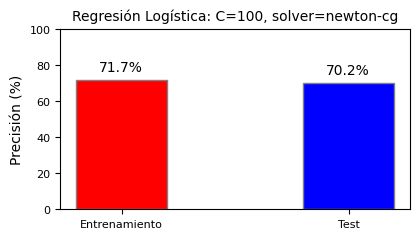

In [16]:
import matplotlib.pyplot as plt
plot_logreg_results(train_accuracy*100, test_accuracy*100, grid_search.best_params_)
